# **Taller 2b**
## **Fecha:** 15/07/2025
## **Nombres:**  Joseph Jimenez

Grafique la trayectoria con una animacion de los siguientes sistemas de ecuaciones :
1. Gauss Jacobi
 
 x1+x2=7

 −2x1+5x2=0

 X0=(0,0)
 
 X0=(7,4)

2. Gauss Seidel y gauss Jacobi

x1+x2=6

−2x1+x2=0

Prueba 3 posiciones iniciales, encuentre una en la que diverge el sistema. 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--- Gauss-Jacobi ---
[07-15 17:47:27][INFO] i= 0 x: [[0. 0.]]
[07-15 17:47:27][INFO] i= 1 x: [[7. 0.]]
[07-15 17:47:27][INFO] i= 2 x: [[7.  2.8]]
[07-15 17:47:27][INFO] i= 3 x: [[4.2 2.8]]
[07-15 17:47:27][INFO] i= 4 x: [[4.2  1.68]]
[07-15 17:47:27][INFO] i= 5 x: [[5.32 1.68]]
[07-15 17:47:27][INFO] i= 6 x: [[5.32  2.128]]
[07-15 17:47:27][INFO] i= 7 x: [[4.872 2.128]]
[07-15 17:47:27][INFO] i= 8 x: [[4.872  1.9488]]
[07-15 17:47:27][INFO] i= 9 x: [[5.0512 1.9488]]
[07-15 17:47:27][INFO] i= 10 x: [[5.0512  2.02048]]
[07-15 17:47:27][INFO] i= 11 x: [[4.97952 2.02048]]
[07-15 17:47:27][INFO] i= 12 x: [[4.97952  1.991808]]
[07-15 17:47:27][INFO] i= 13 x: [[5.008192 1.991808]]
[07-15 17:47:27][INFO] i= 14 x: [[5.008192  2.0032768]]
[07-15 17:47:27][INFO] i= 15 x: [[4.9967232 2.0032768]]
[07-15 17:47:27][INFO] i= 16 x: [[4.9967232  1.99868928]]
[07-15 17:47:27][INFO] i= 17 x: [[5.00131072 1.99868928]]
[

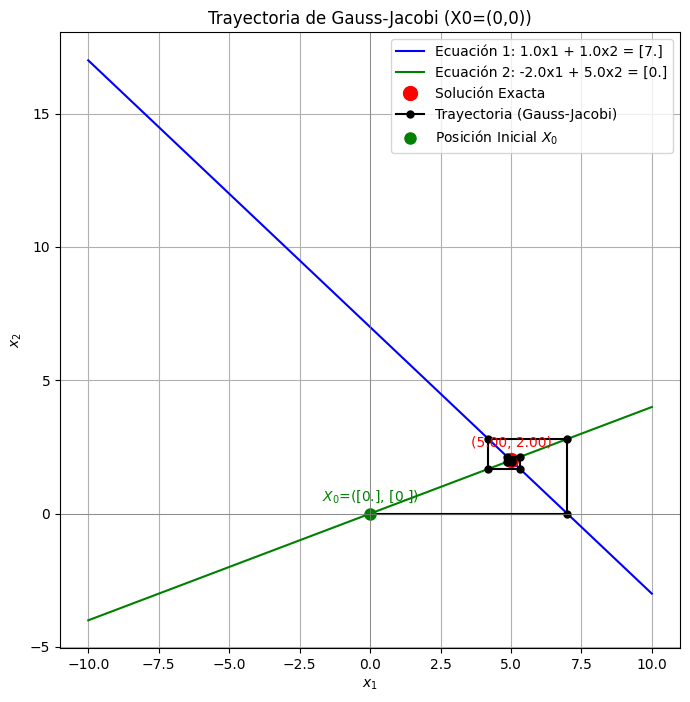

[07-15 17:47:27][INFO] i= 0 x: [[7. 4.]]
[07-15 17:47:27][INFO] i= 1 x: [[3.  2.8]]
[07-15 17:47:27][INFO] i= 2 x: [[4.2 1.2]]
[07-15 17:47:27][INFO] i= 3 x: [[5.8  1.68]]
[07-15 17:47:27][INFO] i= 4 x: [[5.32 2.32]]
[07-15 17:47:27][INFO] i= 5 x: [[4.68  2.128]]
[07-15 17:47:27][INFO] i= 6 x: [[4.872 1.872]]
[07-15 17:47:27][INFO] i= 7 x: [[5.128  1.9488]]
[07-15 17:47:27][INFO] i= 8 x: [[5.0512 2.0512]]
[07-15 17:47:27][INFO] i= 9 x: [[4.9488  2.02048]]
[07-15 17:47:27][INFO] i= 10 x: [[4.97952 1.97952]]
[07-15 17:47:27][INFO] i= 11 x: [[5.02048  1.991808]]
[07-15 17:47:27][INFO] i= 12 x: [[5.008192 2.008192]]
[07-15 17:47:27][INFO] i= 13 x: [[4.991808  2.0032768]]
[07-15 17:47:27][INFO] i= 14 x: [[4.9967232 1.9967232]]
[07-15 17:47:27][INFO] i= 15 x: [[5.0032768  1.99868928]]
[07-15 17:47:27][INFO] i= 16 x: [[5.00131072 2.00131072]]
[07-15 17:47:27][INFO] i= 17 x: [[4.99868928 2.00052429]]
[07-15 17:47:27][INFO] i= 18 x: [[4.99947571 1.99947571]]
[07-15 17:47:27][INFO] i= 19 x: [[5.

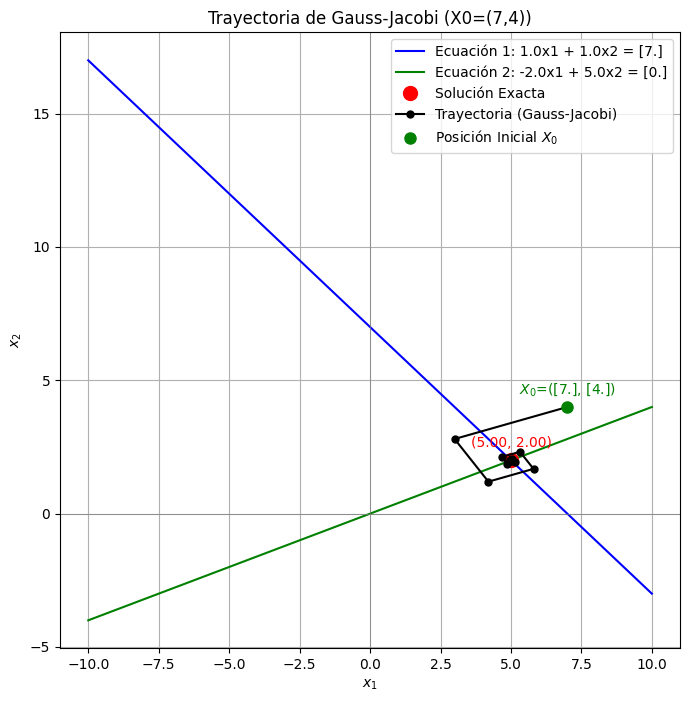

In [25]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from src import gauss_jacobi, gauss_seidel

# Se definen los parámetros para los métodos iterativos

TOL = 1e-5
MAX_ITER = 30

# Función para graficar la trayectoria y las líneas del sistema
def plot_trajectory(A, b, tray, method_name, x0, title):
    """
    Grafica la trayectoria de las aproximaciones de un método iterativo.
    """
    plt.figure(figsize=(8, 8))
    
    x1 = np.linspace(-10, 10, 400)
    
    # Graficar la primera línea de la ecuación
    # a11*x1 + a12*x2 = b1  =>  x2 = (b1 - a11*x1) / a12
    x2_line1 = (b[0] - A[0, 0] * x1) / A[0, 1]
    plt.plot(x1, x2_line1, label=f'Ecuación 1: {A[0,0]}x1 + {A[0,1]}x2 = {b[0]}', color='blue')
    
    # Graficar la segunda línea de la ecuación
    # a21*x1 + a22*x2 = b2  =>  x2 = (b2 - a21*x1) / a22
    x2_line2 = (b[1] - A[1, 0] * x1) / A[1, 1]
    plt.plot(x1, x2_line2, label=f'Ecuación 2: {A[1,0]}x1 + {A[1,1]}x2 = {b[1]}', color='green')
    
    # Obtener el punto de la solución exacta para graficarlo
    try:
        exact_solution = np.linalg.solve(A, b)
        plt.plot(exact_solution[0, 0], exact_solution[1, 0], 'ro', markersize=10, label='Solución Exacta')
        plt.text(exact_solution[0, 0], exact_solution[1, 0] + 0.5, f'({exact_solution[0, 0]:.2f}, {exact_solution[1, 0]:.2f})', horizontalalignment='center', color='red')
    except np.linalg.LinAlgError:
        exact_solution = None

    # Extraer las coordenadas de la trayectoria para graficar
    tray_points = np.array([p.flatten() for p in tray])
    
    # Graficar la trayectoria del método iterativo
    plt.plot(tray_points[:, 0], tray_points[:, 1], 'k-o', label=f'Trayectoria ({method_name})', markersize=5)
    plt.plot(x0[0], x0[1], 'go', markersize=8, label='Posición Inicial $X_0$')
    
    # Anotar el punto de inicio
    
    #plt.xlim(limx, 7.5)
    #plt.ylim(-5, 10)
    plt.text(x0[0], x0[1] + 0.5, f'$X_0$=({x0[0]}, {x0[1]})', horizontalalignment='center', color='green')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(title)
    plt.grid(True)
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.legend()
    plt.show()

# --------------------------------------------------------------------
# 1. Graficar la trayectoria de Gauss-Jacobi
# --------------------------------------------------------------------
print("--- Gauss-Jacobi ---")

# Definir el sistema de ecuaciones:
# x1 + x2 = 7
# -2x1 + 5x2 = 0
A_jacobi = np.array([[1, 1], [-2, 5]], dtype=float)
b_jacobi = np.array([7, 0], dtype=float).reshape(-1, 1)

# Caso 1.a: X0 = (0,0)
x0_jacobi_1 = np.array([0, 0], dtype=float).reshape(-1, 1)
solution_jacobi_1, tray_jacobi_1 = gauss_jacobi(A=A_jacobi, b=b_jacobi, x0=x0_jacobi_1, tol=TOL, max_iter=MAX_ITER)
print(f"Gauss-Jacobi con X0=(0,0) converge a: {solution_jacobi_1.T}")
plot_trajectory(A_jacobi, b_jacobi, tray_jacobi_1, "Gauss-Jacobi", x0_jacobi_1, "Trayectoria de Gauss-Jacobi (X0=(0,0))")

# Caso 1.b: X0 = (7,4)
x0_jacobi_2 = np.array([7, 4], dtype=float).reshape(-1, 1)
solution_jacobi_2, tray_jacobi_2 = gauss_jacobi(A=A_jacobi, b=b_jacobi, x0=x0_jacobi_2, tol=TOL, max_iter=MAX_ITER)
print(f"Gauss-Jacobi con X0=(7,4) converge a: {solution_jacobi_2.T}")
plot_trajectory(A_jacobi, b_jacobi, tray_jacobi_2, "Gauss-Jacobi", x0_jacobi_2, "Trayectoria de Gauss-Jacobi (X0=(7,4))")


[07-15 17:49:42][INFO] i= 0 x: [[0 0]]
[07-15 17:49:42][INFO] i= 1 x: [[7. 0.]]
[07-15 17:49:42][INFO] i= 2 x: [[7.  2.8]]
[07-15 17:49:42][INFO] i= 3 x: [[4.2 2.8]]
[07-15 17:49:42][INFO] i= 4 x: [[4.2  1.68]]
[07-15 17:49:42][INFO] i= 5 x: [[5.32 1.68]]
[07-15 17:49:42][INFO] i= 6 x: [[5.32  2.128]]
[07-15 17:49:42][INFO] i= 7 x: [[4.872 2.128]]
[07-15 17:49:42][INFO] i= 8 x: [[4.872  1.9488]]
[07-15 17:49:42][INFO] i= 9 x: [[5.0512 1.9488]]
[07-15 17:49:42][INFO] i= 10 x: [[5.0512  2.02048]]
[07-15 17:49:42][INFO] i= 11 x: [[4.97952 2.02048]]
[07-15 17:49:42][INFO] i= 12 x: [[4.97952  1.991808]]
[07-15 17:49:42][INFO] i= 13 x: [[5.008192 1.991808]]
[07-15 17:49:42][INFO] i= 14 x: [[5.008192  2.0032768]]
[07-15 17:49:42][INFO] i= 15 x: [[4.9967232 2.0032768]]


[07-15 17:49:42][INFO] i= 16 x: [[4.9967232  1.99868928]]
[07-15 17:49:42][INFO] i= 17 x: [[5.00131072 1.99868928]]
[07-15 17:49:42][INFO] i= 18 x: [[5.00131072 2.00052429]]
[07-15 17:49:42][INFO] i= 19 x: [[4.99947571 2.00052429]]


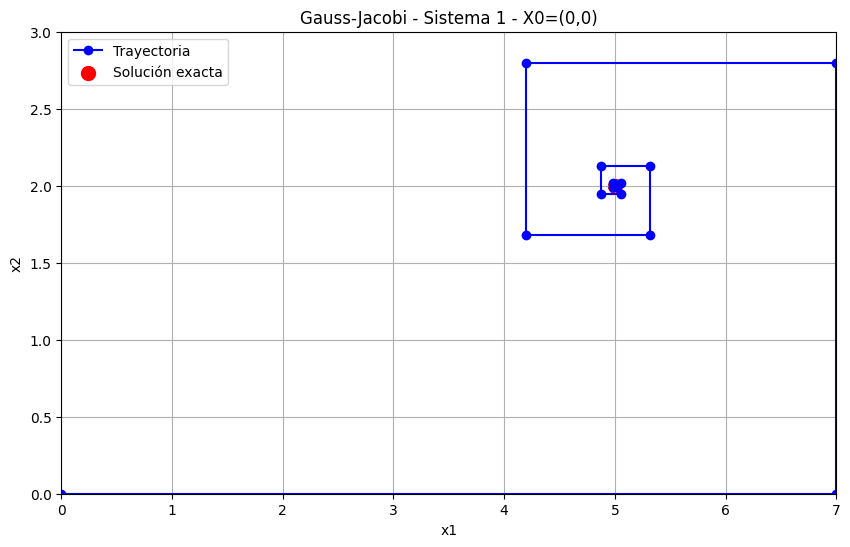

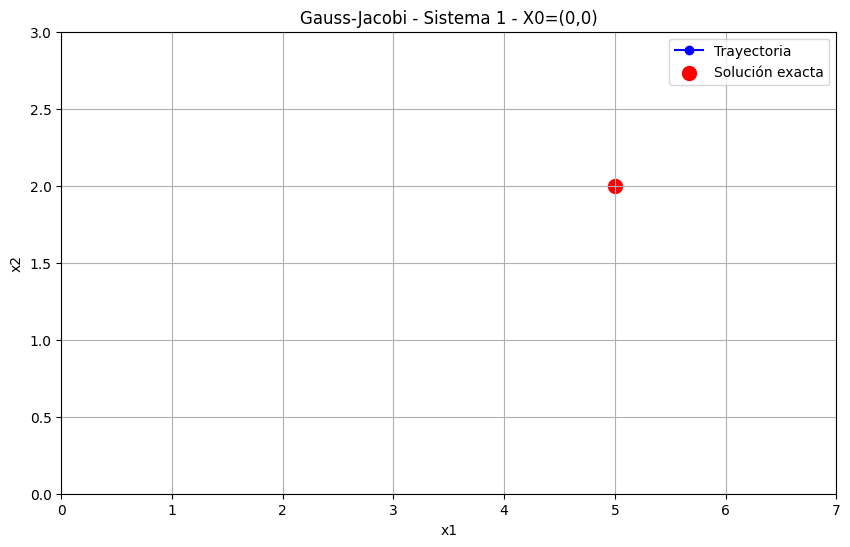

[07-15 17:49:42][INFO] i= 0 x: [[7 4]]
[07-15 17:49:42][INFO] i= 1 x: [[3.  2.8]]
[07-15 17:49:42][INFO] i= 2 x: [[4.2 1.2]]
[07-15 17:49:42][INFO] i= 3 x: [[5.8  1.68]]
[07-15 17:49:42][INFO] i= 4 x: [[5.32 2.32]]
[07-15 17:49:42][INFO] i= 5 x: [[4.68  2.128]]
[07-15 17:49:42][INFO] i= 6 x: [[4.872 1.872]]
[07-15 17:49:42][INFO] i= 7 x: [[5.128  1.9488]]
[07-15 17:49:42][INFO] i= 8 x: [[5.0512 2.0512]]
[07-15 17:49:42][INFO] i= 9 x: [[4.9488  2.02048]]
[07-15 17:49:42][INFO] i= 10 x: [[4.97952 1.97952]]
[07-15 17:49:42][INFO] i= 11 x: [[5.02048  1.991808]]
[07-15 17:49:42][INFO] i= 12 x: [[5.008192 2.008192]]
[07-15 17:49:42][INFO] i= 13 x: [[4.991808  2.0032768]]
[07-15 17:49:42][INFO] i= 14 x: [[4.9967232 1.9967232]]
[07-15 17:49:42][INFO] i= 15 x: [[5.0032768  1.99868928]]
[07-15 17:49:42][INFO] i= 16 x: [[5.00131072 2.00131072]]
[07-15 17:49:42][INFO] i= 17 x: [[4.99868928 2.00052429]]
[07-15 17:49:42][INFO] i= 18 x: [[4.99947571 1.99947571]]
[07-15 17:49:42][INFO] i= 19 x: [[5.00

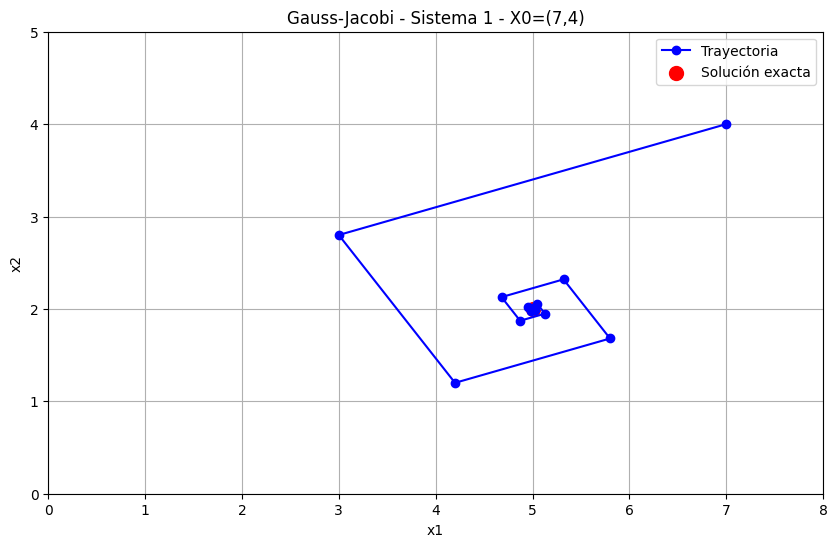

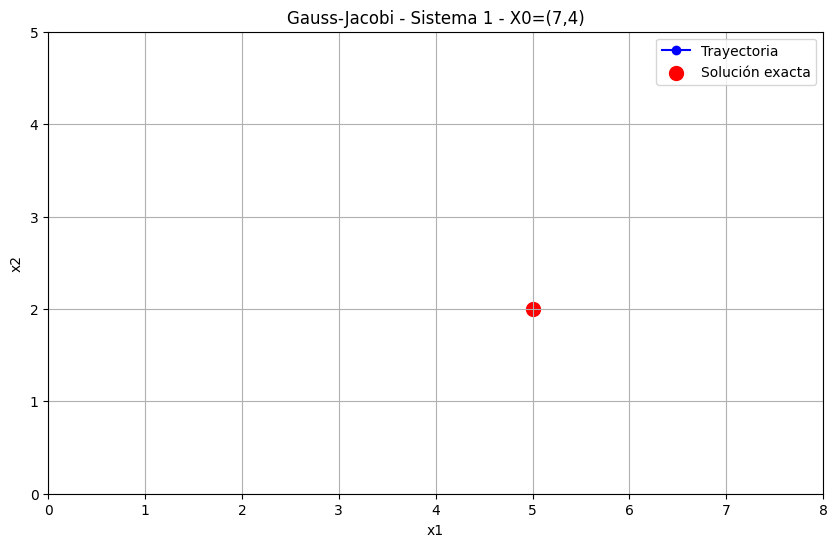

[07-15 17:49:42][INFO] i= 0 x: [[0 0]]
[07-15 17:49:43][INFO] i= 1 x: [[6. 0.]]
[07-15 17:49:43][INFO] i= 2 x: [[ 6. 12.]]
[07-15 17:49:43][INFO] i= 3 x: [[-6. 12.]]
[07-15 17:49:43][INFO] i= 4 x: [[ -6. -12.]]
[07-15 17:49:43][INFO] i= 5 x: [[ 18. -12.]]
[07-15 17:49:43][INFO] i= 6 x: [[18. 36.]]
[07-15 17:49:43][INFO] i= 7 x: [[-30.  36.]]
[07-15 17:49:43][INFO] i= 8 x: [[-30. -60.]]
[07-15 17:49:43][INFO] i= 9 x: [[ 66. -60.]]
[07-15 17:49:43][INFO] i= 10 x: [[ 66. 132.]]
[07-15 17:49:43][INFO] i= 11 x: [[-126.  132.]]
[07-15 17:49:43][INFO] i= 12 x: [[-126. -252.]]
[07-15 17:49:43][INFO] i= 13 x: [[ 258. -252.]]
[07-15 17:49:43][INFO] i= 14 x: [[258. 516.]]
[07-15 17:49:43][INFO] i= 15 x: [[-510.  516.]]
[07-15 17:49:43][INFO] i= 16 x: [[ -510. -1020.]]
[07-15 17:49:43][INFO] i= 17 x: [[ 1026. -1020.]]
[07-15 17:49:43][INFO] i= 18 x: [[1026. 2052.]]
[07-15 17:49:43][INFO] i= 19 x: [[-2046.  2052.]]
[07-15 17:49:43][INFO] i= 20 x: [[-2046. -4092.]]
[07-15 17:49:43][INFO] i= 21 x: [[

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from src import gauss_jacobi, gauss_seidel

# Configuración de logging y matplotlib
import logging
logging.basicConfig(level=logging.INFO)


def plot_trajectory(tray, title, x_limits, y_limits, solution):
    """Grafica la trayectoria de las iteraciones."""
    plt.figure(figsize=(10, 6))
    x_vals = [x[0, 0] for x in tray]
    y_vals = [x[1, 0] for x in tray]
    
    plt.plot(x_vals, y_vals, 'bo-', label='Trayectoria')
    plt.scatter(solution[0], solution[1], color='red', s=100, label='Solución exacta')
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(x_limits)
    plt.ylim(y_limits)
    plt.grid(True)
    plt.legend()
    plt.show()

def animate_trajectory(tray, title, x_limits, y_limits, solution):
    """Crea una animación de la trayectoria."""
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title(title)
    ax.grid(True)
    
    line, = ax.plot([], [], 'bo-', label='Trayectoria')
    point = ax.scatter([], [], color='red', s=100, label='Solución exacta')
    ax.scatter(solution[0], solution[1], color='red', s=100)
    ax.legend()
    
    def init():
        line.set_data([], [])
        return line,
    
    def update(frame):
        x_vals = [x[0, 0] for x in tray[:frame+1]]
        y_vals = [x[1, 0] for x in tray[:frame+1]]
        line.set_data(x_vals, y_vals)
        return line,
    
    ani = FuncAnimation(fig, update, frames=len(tray), init_func=init, blit=True, interval=500)
    plt.show()
    
    return ani

# --------------------------------------------
# Sistema 1: Gauss-Jacobi
# x1 + x2 = 7
# -2x1 + 5x2 = 0
# Solución exacta: (5, 2)
# --------------------------------------------
A1 = np.array([[1, 1], [-2, 5]])
b1 = np.array([[7], [0]])
sol1 = np.array([5, 2])

# Caso 1: X0 = (0, 0)
x0_1a = np.array([[0], [0]])
x_jacobi1a, tray_jacobi1a = gauss_jacobi(A=A1, b=b1, x0=x0_1a, tol=1e-6, max_iter=20)
plot_trajectory(tray_jacobi1a, "Gauss-Jacobi - Sistema 1 - X0=(0,0)", (0, 7), (0, 3), sol1)
ani_jacobi1a = animate_trajectory(tray_jacobi1a, "Gauss-Jacobi - Sistema 1 - X0=(0,0)", (0, 7), (0, 3), sol1)

# Caso 2: X0 = (7, 4)
x0_1b = np.array([[7], [4]])
x_jacobi1b, tray_jacobi1b = gauss_jacobi(A=A1, b=b1, x0=x0_1b, tol=1e-6, max_iter=20)
plot_trajectory(tray_jacobi1b, "Gauss-Jacobi - Sistema 1 - X0=(7,4)", (0, 8), (0, 5), sol1)
ani_jacobi1b = animate_trajectory(tray_jacobi1b, "Gauss-Jacobi - Sistema 1 - X0=(7,4)", (0, 8), (0, 5), sol1)

# --------------------------------------------
# Sistema 2: Gauss-Seidel y Gauss-Jacobi
# x1 + x2 = 6
# -2x1 + x2 = 0
# Solución exacta: (2, 4)
# --------------------------------------------
A2 = np.array([[1, 1], [-2, 1]])
b2 = np.array([[6], [0]])
sol2 = np.array([2, 4])

# Prueba con diferentes condiciones iniciales
initial_conditions = [
    (np.array([[0], [0]]), "X0=(0,0)"),
    (np.array([[3], [3]]), "X0=(3,3)"),
    (np.array([[10], [-5]]), "X0=(10,-5)"),  # Esta probablemente diverja
    (np.array([[100], [-50]]), "X0=(100,-50)")  # Esta casi seguro diverja
]

for x0, label in initial_conditions:
    try:
        # Gauss-Jacobi
        x_jacobi, tray_jacobi = gauss_jacobi(A=A2, b=b2, x0=x0, tol=1e-6, max_iter=50)
        plot_trajectory(tray_jacobi, f"Gauss-Jacobi - Sistema 2 - {label}", 
                       min(-5, x0[0,0]-5), max(10, x0[1,0]+5), 
                       min(-5, x0[0,0]-5), max(10, x0[1,0]+5), sol2)
        
        # Gauss-Seidel
        x_seidel, tray_seidel = gauss_seidel(A=A2, b=b2, x0=x0, tol=1e-6, max_iter=50)
        plot_trajectory(tray_seidel, f"Gauss-Seidel - Sistema 2 - {label}", 
                       min(-5, x0[0,0]-5), max(10, x0[1,0]+5), 
                       min(-5, x0[0,0]-5), max(10, x0[1,0]+5), sol2)
        
    except Exception as e:
        print(f"El método diverge para {label}: {str(e)}")